In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import xarray as xr
import pyrsktools
import glob
import seawater
import datetime
import matplotlib.cm as cm
from getInletX import getInletX
%matplotlib widget

In [102]:
!mv getInletX.py ../

In [77]:
#1769, 5710
#9764, 11523
#13690, 14920
#16923, 18330
#19800, 20745
#22680, 23759
#25551, 26657
#28342, 29530
##30960, 32235
#33620, 35450
#37950, 39865
#42230, 44660

cruise_name = '20220904'

Casts = {'H1': [1769, 5710],
         'A2': [9764, 11523],
        'A3': [13690, 14920],
        'A5': [16923, 18330],
        'S8': [19800, 20745],
         'S5.5': [22680, 23759],
         'S5': [25551, 26657],
         'S12.5': [28342, 29530],
         'S12': [30960, 32235],
         'S4.5': [33620, 35450],
         'S4.25': [37950, 39865],
         'S4': [42230, 44660]
        }

ruskinname = './ruskin/206664_20220924_0958.rsk'

## Note to get the downcasts and lat/lon you need to run Rskin software!!!



In [3]:
# rsk to xarray
with pyrsktools.open(ruskinname) as rsk:
    channel_names = rsk.channels.keys()
    print(channel_names)
    print(rsk.npsamples()['conductivity_00'])
    for nn, cast in enumerate(Casts):
        start = Casts[cast][0]
        stop = Casts[cast][1]
        time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]
        print('time', time[0])
        ds = xr.Dataset(coords={'time':time})
        ds.attrs = {'start_time': str(time[0]),
                    'end_time': str(time[-1]),
                    'serial_number': rsk.instrument.serial,
                    'model': rsk.instrument.model,
                    'firmware_version': rsk.instrument.firmware_version,
                    'firmware_type': str(rsk.instrument.firmware_type),
                    }

        for channel in channel_names:
            ds[channel] = ('time', rsk.npsamples()[channel][start:stop])
            ds[channel].attrs = {'units': rsk.channels[channel].units,
                                 'derived': str(rsk.channels[channel].derived),
                                 'long_name': rsk.channels[channel].name}
        ds['potential_density'] = ('time', seawater.eos80.pden(ds.salinity_00, ds.temperature_00, ds.pressure_00-10.0, 0))
        ds['station_name'] = cast
            
        outname = f'casts/{rsk.instrument.serial}'
        outname += '_' + time[0].astype(datetime.datetime).strftime('%Y%m%d%H%M%S') + '.nc'
        ds.to_netcdf(outname)
 

odict_keys(['conductivity_00', 'temperature_00', 'pressure_00', 'chlorophyll_00', 'oxygensaturation_00', 'par_00', 'seapressure_00', 'depth_00', 'salinity_00', 'speedofsound_00', 'specificconductivity_00'])
[        nan  0.00195661  0.00079353 ... -0.00035044  0.00083962
  0.00293929]


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T17:06:33.875


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T17:35:48.125


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T17:59:46.625


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T18:20:08.750


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T18:38:07.875


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T22:10:36.250


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T22:29:23.375


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T22:41:17.500


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T22:56:51.500


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T23:10:36.500


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T23:27:24.750


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-24T23:46:00.875


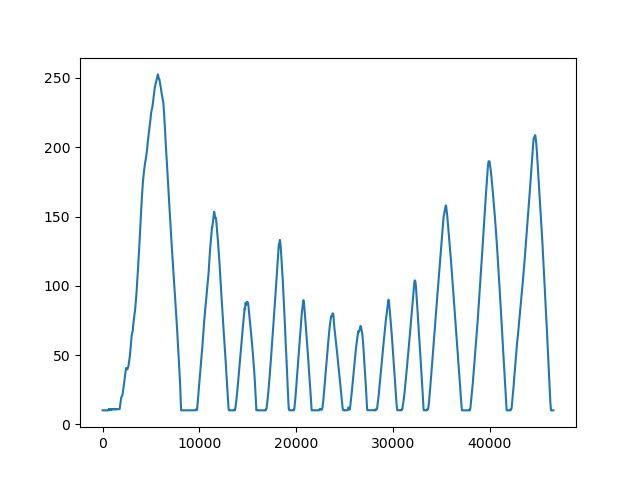

In [56]:

with pyrsktools.open('./ruskin/206664_20220924_0958.rsk') as rsk:
    channel_names = rsk.channels.keys()
    fig, ax = plt.subplots()
    ax.plot(rsk.npsamples()['pressure_00'])


22680, 23759
25551, 26657
28342, 29530
30960, 32235
33620, 35450
37950, 39865
42230, 44660




In [44]:
!rm CTDGrid.nc
dat = glob.glob('casts/*.nc')
dat.sort()
Ncasts = len(dat)
depthbins = np.arange(0, 325, 1)
depths = depthbins[:-1] + 0.5
grid = xr.Dataset(coords={'depths':depths, 'cast':np.arange(Ncasts)})
sources = {'pressure': 'seapressure_00', 'temperature': 'temperature_00',
           'conductivity': 'conductivity_00', 'chlorophyll':'chlorophyll_00',
           'oxygensaturation':'oxygensaturation_00', 'salinity': 'salinity_00',
           'par':'par_00', 'potential_density':'potential_density'}

grid['time'] = ('cast', np.zeros(Ncasts))
for s in sources:
    grid[s] = (('depths', 'cast'), np.zeros((len(depths), Ncasts)))

grid['station_name'] = (('cast'), ['long_empty_string'] * Ncasts)

for nn, d in enumerate(dat):
    with xr.open_dataset(d) as ds:
        grid['time'][nn] = ds.time[0]
        for s in sources:
            grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
                              np.histogram(ds.depth_00, depthbins)[0])
            if nn == len(dat)-1:
                grid[s].attrs = ds[sources[s]].attrs

    grid['station_name'][nn] = ds.station_name
grid.time.attrs = {"units": 'nanoseconds since 1970-01-01T00:00:00'}


grid.to_netcdf('CTDGridRuskin.nc')          

print(grid)

rm: CTDGrid.nc: No such file or directory


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/884252744.py:23: RuntimeWarning: invalid value encountered in true_divide
  grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/884252744.py:23: RuntimeWarning: invalid value encountered in true_divide
  grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/884252744.py:23: RuntimeWarning: invalid value encountered in true_divide
  grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/884252744.py:23: RuntimeWarning: invalid value encountered in true_divide
  grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/884252744.py:23: RuntimeWarning: invalid

AttributeError: 'Dataset' object has no attribute 'longitude'

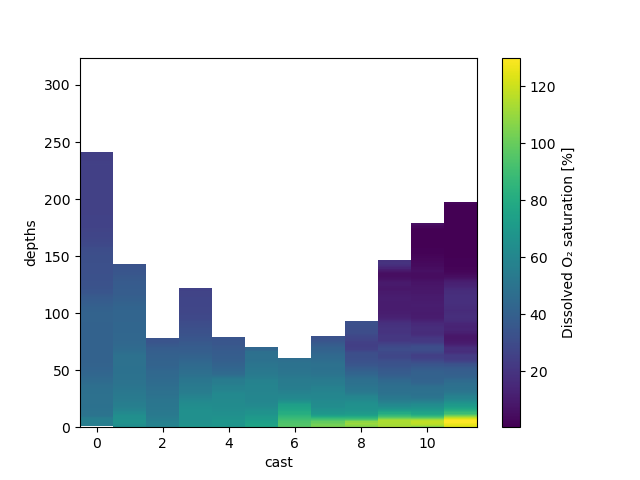

In [24]:
# print(grid)
fig, ax = plt.subplots()
grid['oxygensaturation'].plot.pcolormesh()

In [25]:
with pyrsktools.open(ruskinname) as rsk:
    Ngeo = len(list(rsk.geodata()))
    geods = xr.Dataset(coords={'sample': np.arange(0, Ngeo)})
    geods['time'] = ('sample', np.zeros(Ngeo))
    geods['latitude'] = ('sample', np.zeros(Ngeo))
    geods['longitude'] = ('sample', np.zeros(Ngeo))
    
    for nn, geo in enumerate(rsk.geodata()):
        geods['time'][nn] = np.datetime64(geo.timestamp)
        geods['latitude'][nn] = geo.latitude
        geods['longitude'][nn] = geo.longitude
geods.time.attrs = {"units": 'nanoseconds since 1970-01-01T00:00:00'}

geods.to_netcdf('Geo.nc')




/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_1359/2684484812.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  geods['time'][nn] = np.datetime64(geo.timestamp)


In [26]:
geods

<xarray.Dataset>
Dimensions:    (sample: 12433)
Coordinates:
  * sample     (sample) int64 0 1 2 3 4 5 ... 12428 12429 12430 12431 12432
Data variables:
    time       (sample) float64 1.664e+18 1.664e+18 ... 1.664e+18 1.664e+18
    latitude   (sample) float64 48.71 48.71 48.72 48.74 ... 48.64 48.64 48.64
    longitude  (sample) float64 -123.2 -123.2 -123.3 ... -123.5 -123.5 -123.5

In [50]:
with xr.open_dataset('Geo.nc', engine='netcdf4') as geods, xr.open_dataset('CTDGridRuskin.nc', engine='netcdf4') as cgrid:
    cgrid['longitude'] = ('cast', np.interp(cgrid.time, geods.time, geods.longitude))
    cgrid['latitude'] = ('cast', np.interp(cgrid.time, geods.time, geods.latitude))

cgrid = cgrid.swap_dims({'cast':'time'})

x, y = getInletX(cgrid.longitude, cgrid.latitude)
cgrid['alongx'] = ('time', x, {'units':'dist from S4 [km]'})
cgrid['acrossx'] = ('time', y, {'units':'dist Thalweg [km]'})

cgrid = cgrid.sortby('alongx')

cgrid.to_netcdf('CTDGridGeoRuskin.nc')          
display(cgrid)

<xarray.Dataset>
Dimensions:            (depths: 324, time: 12)
Coordinates:
  * depths             (depths) float64 0.5 1.5 2.5 3.5 ... 321.5 322.5 323.5
    cast               (time) int64 11 10 9 8 7 6 5 4 3 2 1 0
  * time               (time) datetime64[ns] 2022-09-24T23:46:00.875000064 .....
Data variables: (12/13)
    pressure           (depths, time) float64 ...
    temperature        (depths, time) float64 ...
    conductivity       (depths, time) float64 ...
    chlorophyll        (depths, time) float64 ...
    oxygensaturation   (depths, time) float64 ...
    salinity           (depths, time) float64 ...
    ...                 ...
    potential_density  (depths, time) float64 ...
    station_name       (time) object ...
    longitude          (time) float64 -123.5 -123.5 -123.5 ... -123.3 -123.2
    latitude           (time) float64 48.64 48.66 48.67 ... 48.76 48.73 48.71
    alongx             (time) float64 -0.438 1.842 3.474 ... 21.73 26.31 29.02
    acrossx            (time) float64 0.1403 0.294 0.5684 ... 0.09388 0.08632

In [51]:
# convert CTDgridGeo to Old-names CTD grid
rename = {'conductivity': 'cond', 
         'temperature': 'temp', 
         'pressure': 'pres',
         'oxygensaturation': 'O2sat', 
         'salinity': 'sal',
         'potential_density': 'pden', 
         'chlorophyll': 'Flu',
         'longitude': 'lon',
         'latitude': 'lat',
         'station_name': 'id',
         'par': 'Par'}

ds = cgrid.rename(rename)
display(ds)
ds.to_netcdf('./CtdGrid.nc')

<xarray.Dataset>
Dimensions:  (depths: 324, time: 12)
Coordinates:
  * depths   (depths) float64 0.5 1.5 2.5 3.5 4.5 ... 320.5 321.5 322.5 323.5
    cast     (time) int64 11 10 9 8 7 6 5 4 3 2 1 0
  * time     (time) datetime64[ns] 2022-09-24T23:46:00.875000064 ... 2022-09-...
Data variables: (12/13)
    pres     (depths, time) float64 0.9396 0.8128 0.8714 0.8776 ... nan nan nan
    temp     (depths, time) float64 15.17 15.0 14.64 14.35 ... nan nan nan nan
    cond     (depths, time) float64 35.36 35.26 34.9 34.66 ... nan nan nan nan
    Flu      (depths, time) float64 6.029 3.576 4.385 3.477 ... nan nan nan nan
    O2sat    (depths, time) float64 123.1 107.7 113.3 106.3 ... nan nan nan nan
    sal      (depths, time) float64 28.09 28.12 28.07 28.05 ... nan nan nan nan
    ...       ...
    pden     (depths, time) float64 1.021e+03 1.021e+03 1.021e+03 ... nan nan
    id       (time) object 'S4' 'S4.25' 'S4.5' 'S12' ... 'A5' 'A3' 'A2' 'H1'
    lon      (time) float64 -123.5 -123.5 -123.5 -123.5 ... -123.3 -123.3 -123.2
    lat      (time) float64 48.64 48.66 48.67 48.69 ... 48.76 48.76 48.73 48.71
    alongx   (time) float64 -0.438 1.842 3.474 5.485 ... 18.03 21.73 26.31 29.02
    acrossx  (time) float64 0.1403 0.294 0.5684 ... 0.05532 0.09388 0.08632

In [92]:
# save as matlab
import scipy.io as sio
from datetime import datetime, timedelta

cout = {}

def datetime642matlab(dt):
    dt = dt.astype('datetime64[ms]').astype(datetime)
    return datetime2matlab(dt)

def datetime2matlab(dt):
    mdn = dt + timedelta(days = 366)
    frac = (dt-datetime(dt.year,dt.month,dt.day,0,0,0)).seconds

    return mdn.toordinal() + frac / (24.0 * 60.0 * 60.0)

with xr.open_dataset('CtdGrid.nc') as ds:
    cout['time'] = np.array([datetime642matlab(t) for t in ds.time.values])
    cout['depths'] = ds.depths.values
    for k in cg['data_vars'].keys():
        cout[k] = ds[k].values
    
    sio.savemat('./CtdGrid.mat', cout, format='5')


## Individual casts:

In [108]:
with xr.open_dataset('CtdGrid.nc') as cgrid:
    for i in range(cgrid.dims['time']):
        ds = cgrid.isel(time=i)
        id = str(ds.id.values).strip('.')
        name = f'{cruise_name}_{id}'.replace('.', '')
        ds.to_netcdf(f'{name}.nc')
        
        # matlab:
        cout = {}
        cout['time'] = datetime642matlab(ds.time.values)
        cout['depths'] = ds.depths.values
        for k in ds.keys():
            cout[k] = ds[k].values
        sio.savemat(f'{name}.mat', cout)
        

20220904_A2.mat     20220904_S125.mat   20220904_S55.mat    Geo.nc
20220904_A2.nc      20220904_S125.nc    20220904_S55.nc     ProcessRuskin.ipynb
20220904_A3.mat     20220904_S4.mat     20220904_S8.mat     __pycache__
20220904_A3.nc      20220904_S4.nc      20220904_S8.nc      casts
20220904_A5.mat     20220904_S425.mat   CTDGridGeo.nc       doc
20220904_A5.nc      20220904_S425.nc    CTDGridGeoRuskin.nc getInletX.py
20220904_H1.mat     20220904_S45.mat    CTDGridRuskin.nc    ruskin
20220904_H1.nc      20220904_S45.nc     CtdGrid.mat
20220904_S12.mat    20220904_S5.mat     CtdGrid.nc
20220904_S12.nc     20220904_S5.nc      CtdGridNew.mat


In [101]:
!code ../

In [107]:
for k in ds.keys():
    print(k)

pres
temp
cond
Flu
O2sat
sal
Par
pden
id
lon
lat
alongx
acrossx
